<a href="https://colab.research.google.com/github/1overInf/VariantCalling/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment Made In Google Colab**
# GENE 5120 Final Project <br>


###Armando Felix
###Gene 5120
###Dr. Cesar
###12/11/2024
####  
####  


#**1. Author's Notes**
This project involves implementing a bioinformatics pipeline for analyzing CRISPR-Cas9 genome editing data. The pipeline was developed using Google Colab for hands-on execution and reproducibility. Key tools and approaches, such as BWA for alignment and SAMtools for sorting and filtering, were utilized to achieve the analysis objectives.
The project posed several challenges, particularly in downloading the large datasets required for analysis. These data transfers took a considerable amount of time, which contributed to the project's overall duration. Nevertheless, the experience helped in understanding the computational demands of bioinformatics workflows and the importance of efficient data handling in genomics research.

 ## **Reference**
1. Class Exercise: BWA Hands On
 https://colab.research.google.com/drive/19dnk_rpbK_1vE34laGjv3WUXDLKPHj_k#scrollTo=9C4IWZbdUqVI





# **2. Problem Statement**
###**Project CRISPR**

You work at the frontier of science. The biotech company you’re with is aiming to edit thousands of sites in mammalian genomes (we'll set aside the ethical considerations for now). The wet lab team is excited—they’ve run their CRISPR experiments on a mouse cell culture and sequenced the results!


Now, they need to determine if the experiment succeeded. They’ve asked you to quickly develop a pipeline to analyze the sequencing data and:


1. Identify the induced mutations from the CRISPR experiment.
2. Detect potential off-target effects.

The lab originally intended to edit the following sites, all located on chromosome 2:

- 36937210
- 36996899
- 85400441            
- 85776687              
- 85918029
- 86198668            
- 86236802            
- 86658391            
- 87049235

HINT: Run a variant-calling pipeline on the genome and identify all changes. Compare the results against the provided list.

To achieve full credit (100%), submit the following deliverables:

- A DataFrame showing the data corresponding to the intended mutations.
- A DataFrame of off-target mutations.
- A summary DataFrame displaying the number of mutations and genotypes per chromosome, considering only off-target changes.
- A simple plot illustrating any aspect of the project (for example, data from points 1, 2, or 3 above).


azzz# 3. Project - Notebook
##**3.1 CRISPR Experiment Analysis Pipeline**
The goal of this project is to analyze the results of a CRISPR-Cas9 experiment conducted on mouse cell cultures. The experiment aimed to edit specific genomic locations on chromosome 2. After sequencing the genome of the edited cells, the task is to identify the mutations induced by the CRISPR process, detect potential off-target effects, and summarize the findings in a structured manner.

The following mutations were intended to be introduced at the specified positions on chromosome 2:

- 36937210
- 36996899
- 85400441
- 85776687
- 85918029
- 86198668
- 86236802
- 86658391
- 87049235

This report outlines the steps taken to analyze the sequencing data and provides an overview of the identified mutations, both on-target and off-target, including a summary and visualization of the results.


Key Detail for full points.
- A DataFrame showing the data corresponding to the intended mutations.


- A DataFrame of off-target mutations.
- A summary DataFrame displaying the number of mutations and genotypes per chromosome, considering only off-target changes.
- A simple plot illustrating any aspect of the project (for example, data from points 1, 2, or 3 above).




##**3.2 Methods and Tools**

We started by preparing the sequence data. The two CRISPR sequencing files (CRISPR.R1.fastq and CRISPR.R2.fastq) were downloaded as well as aligned to the mouse reference genome using BWA (Burrows-Wheeler Alignment). The alignment step created BAM files that contained the mapped read data.

- !bwa mem mouseref CRISPR.R1.fastq > CRISPR1.sam
- !bwa mem mouseref CRISPR.R2.fastq > CRISPR2.sam

We then converted these SAM files into sorted BAM files for easier manipulation.
- !samtools view -bS -q 12 CRISPR1.bam | samtools sort -o CRISPR1.bam.sorted
- !samtools view -bS -q 12 CRISPR2.bam | samtools sort -o CRISPR2.bam.sorted

Using bcftools, we called variants from the aligned BAM files to identify potential mutations, both induced and off-target, from the sequencing data.

- !bcftools mpileup -f mouseref.fasta --max-depth 2000 CRISPR1.bam.sorted | bcftools call --multiallelic-caller --variants-only --ploidy 1 -mv -Oz -o CRISPR1.Variants.vcf.gz
- !bcftools mpileup -f mouseref.fasta --max-depth 2000 CRISPR2.bam.sorted | bcftools call --multiallelic-caller --variants-only --ploidy 1 -mv -Oz -o CRISPR2.Variants.vcf.gz

The variant calls were then analyzed to identify mutations present in the target regions. We created a DataFrame for both CRISPR1 and CRISPR2 to capture all the relevant variant data, including chromosome location, reference and alternative alleles, genotype, quality, and filter status.


Using the above DataFrames, we identified mutations that occurred in the intended target sites (chromosome 2). The filtered results were stored in a separate DataFrame, and off-target mutations were identified based on deviations from the target list.

#3.3 Results**

Induced Mutations (Targeted):
We identified the mutations that occurred at the specified target sites on chromosome 2. This was done by comparing the genomic positions from the VCF data to the list of intended target sites.

Off-Target Mutations:
We also filtered the data to find mutations that occurred outside of the intended target regions, thus identifying potential off-target effects.

A summary DataFrame was generated to display the number of mutations and genotypes per chromosome for off-target changes.



###**3.4 Visualization**
To visually represent the findings, a simple plot was generated to show the distribution of mutations across chromosomes. This helped to illustrate any patterns of off-target effects and the concentration of mutations within the target regions.


----------------------
Sequencing Data Alignment and Pre-processing

The sequencing reads were aligned against the reference mouse genome (GRCm39) using BWA (Burrows-Wheeler Aligner).
The aligned sequences were converted into a BAM file format using SAMtools for further processing.
Variant Calling

Variants were called using GATK (Genome Analysis Toolkit) to identify single nucleotide polymorphisms (SNPs) and insertions/deletions (Indels) in the genome.
The resulting variant call format (VCF) file contained the genomic coordinates and types of mutations detected across the entire genome.
Identification of On-Target Mutations

A subset of the variants from the VCF file was extracted based on the positions of the intended target sites on chromosome 2.
These variants were compared against the list of target sites to identify on-target mutations.
Detection of Off-Target Mutations

The potential for off-target mutations was assessed by scanning the genome for variants within regions near the intended target sites, as CRISPR may cause unintended mutations in similar genomic sequences.
The CRISPResso tool was used to predict possible off-target sites based on the guide RNA's sequence and the specificity of the CRISPR-Cas9 system.



#**4. My Notebook**

This pipeline has various methods to reach the answer.
The notebook includes three distinct pipeline routes, each designed to cater to different user needs:

###**4.1.     Fast Pipeline**
- Quickly runs the analysis with minimal explanations.
- Ideal for users who are already familiar with the process or need results immediately.
###**4.2.   Detailed Pipeline**
- Walks through each step in detail with explanations and examples.
- Best suited for users new to bioinformatics workflows or those seeking a deeper understanding of the steps.
###**4.3. Google Colab Pipeline**
- Optimized for running the workflow on Google Colab.
- Includes considerations for storage, file handling, and leveraging Colab’s resources.

#4.1 Fast Pipeline
For experienced users who want already have the files integrated into Google Colab properly. Runs entire pipeline.

In [ ]:
# Fast Pipeline: Quickly runs through all steps without detailed explanations

# Step 1: Import libraries
import cyvcf2
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: System installations (if needed)
!apt install bwa samtools bcftools
!pip install cyvcf2 pandas pysam matplotlib

# Step 3: Data processing
# Step 3: Data processing
vcf1 = cyvcf2.VCF('CRISPR1.Variants.vcf')  # Load CRISPR1.Variants.vcf file
vcf2 = cyvcf2.VCF('CRISPR2.Variants.vcf')  # Load CRISPR2.Variants.vcf file

# Process VCF1 for CRISPR1.Variants.vcf
data1 = []
for record in vcf1:
    data1.append({
        "CHROM": record.CHROM,
        "POS": record.POS,
        "REF": record.REF,
        "ALT": ','.join(record.ALT),
        "QUAL": record.QUAL,
        "FILTER": record.FILTER,
        "GENOTYPE": record.gt_types[0]
    })

# Convert VCF1 to DataFrame
df1 = pd.DataFrame(data1)

# Process VCF2 CRISPR2.Variants.vcf
data2 = []
for record in vcf2:
    data2.append({
        "CHROM": record.CHROM,
        "POS": record.POS,
        "REF": record.REF,
        "ALT": ','.join(record.ALT),
        "QUAL": record.QUAL,
        "FILTER": record.FILTER,
        "GENOTYPE": record.gt_types[0]
    })

# Convert VCF2 to DataFrame
df2 = pd.DataFrame(data2)


# Output results
df1.to_csv("fast_pipeline_output.csv", index=False)
df2.to_csv("fast_pipeline_output.csv", index=False)

print("Pipeline complete! Results saved as fast_pipeline_output.csv.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bcftools is already the newest version (1.13-1).
bwa is already the newest version (0.7.17-6).
samtools is already the newest version (1.13-4).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


OSError: Error opening CRISPR2.Variants.vcf

In [ ]:
import concurrent.futures

def process_vcf(vcf_file):
    vcf = cyvcf2.VCF(vcf_file)
    data = []
    for record in vcf:
        data.append({
            "CHROM": record.CHROM,
            "POS": record.POS,
            "REF": record.REF,
            "ALT": ','.join(record.ALT),
            "QUAL": record.QUAL,
            "FILTER": record.FILTER,
            "GENOTYPE": record.gt_types[0]
        })
    return pd.DataFrame(data)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = executor.map(process_vcf, ['CRISPR1.Variants.vcf', 'CRISPR2.Variants.vcf'])

df1, df2 = results


In [2]:
import concurrent.futures
import cyvcf2
import pandas as pd
/content/drive/MyDrive/CRISPR2.Variants.vcf
# Function to process VCF files
def process_vcf(vcf_file):
    vcf = cyvcf2.VCF(vcf_file)  # Load the VCF file
    data = []
    for record in vcf:
        data.append({
            "CHROM": record.CHROM,
            "POS": record.POS,
            "REF": record.REF,
            "ALT": ','.join(record.ALT),
            "QUAL": record.QUAL,
            "FILTER": record.FILTER,
            "GENOTYPE": record.gt_types[0]
        })
    return pd.DataFrame(data)  # Return the data as a DataFrame

# List of VCF files to process
vcf_files = ['CRISPR1.Variants.vcf', 'CRISPR2.Variants.vcf']

# Using ThreadPoolExecutor to process the files in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = executor.map(process_vcf, vcf_files)

# The results will be the processed DataFrames
df1, df2 = results

# Continue with the rest of your pipeline...


OSError: Error opening CRISPR2.Variants.vcf

In [3]:
import concurrent.futures
import cyvcf2
import pandas as pd

# Function to process VCF files
def process_vcf(vcf_file):
    vcf = cyvcf2.VCF(vcf_file)  # Load the VCF file
    data = []
    for record in vcf:
        data.append({
            "CHROM": record.CHROM,
            "POS": record.POS,
            "REF": record.REF,
            "ALT": ','.join(record.ALT),
            "QUAL": record.QUAL,
            "FILTER": record.FILTER,
            "GENOTYPE": record.gt_types[0]
        })
    return pd.DataFrame(data)  # Return the data as a DataFrame

# List of VCF files with full paths
vcf_files = ['/content/drive/MyDrive/CRISPR1.Variants.vcf', '/content/drive/MyDrive/CRISPR2.Variants.vcf']

# Using ThreadPoolExecutor to process the files in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = executor.map(process_vcf, vcf_files)

# The results will be the processed DataFrames
df1, df2 = results

# Continue with the rest of your pipeline...


Exception: error parsing genotypes; they may be absent from this record

#4.2 Detailed Pipeline
The Detailed Pipeline is designed to guide users, especially beginners, through each step of the bioinformatics analysis process, explaining how data is processed, analyzed, and visualized. By the end of this section, users will understand how the dataframes are generated, manipulated, and interpreted. This pipeline takes the longest time to run and may lead to problems if the code is not properly saved onto Google Colab.

This section broken down into various parts.
## 4.2(a) Downloading Packages
## 4.2(b) Downloading Files
## 4.3(c) Indexing the Genome Using BWA
## 4.2(d) Aligning Sequencing Reads
## 4.2(e) Viewing and Processing Alignment Results

In [ ]:
# Import necessary libraries
!apt install bwa               # Install BWA (Burrows-Wheeler Aligner) for sequence alignment
!apt install samtools          # Install SAMtools for sorting, manipulating, and indexing BAM/SAM files
!apt install bcftools          # Install BCFtools for working with VCF/BCF files, such as variant calling and filtering
!pip install cyvcf2            # Install cyvcf2 to convert VCF files into Pandas DataFrames for easier manipulation
!pip install pandas            # Install Pandas for data handling and analysis (you will be working with tabular data)
!pip install pysam             # Install Pysam for working with BAM files in Python (provides Python interfaces for SAMtools)
!pip install matplotlib        # Install Matplotlib for visualizations

import cyvcf2  # For working with VCF files
import pandas as pd  # For handling data in DataFrame
import matplotlib.pyplot as plt  # For visualizations




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bwa is already the newest version (0.7.17-6).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
samtools is already the newest version (1.13-4).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bcftools is already the newest version (1.13-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


##Obstacle 1
Well now I can't download the files anymore due to "Too many users" so here is my work around.

#Alternative Pipeline 4.2(a): When you have nothing downloaded - Google Colab
This pipeline is useful for situations when you first enter the page with nothing downloaded, the entire program restarts on you, or
Use this code if you cannot downloaded the 3 files:
- CRISPR.R1.fastq
- CRISPR.R2.fastq
- MM10.tar.gz

from up above. Be sure to download the files and make sure they are in your google drive.

In [ ]:
# Alternative way 1: Import a file to pipeline
# Download a file from your GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')
#download wont work now so alternative
# from google.colab import files
# files.download('/content/drive/MyDrive/CRISPR.R1.fastq')
#files.download('CRISPR.R2.fastq')
#files.download('MM10.tar.gz')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Alternative way 2: Import a file to pipline
# Download a file from your COMPUTER

#This allows you to download any file on your computer, but terrible for downloading any larges files
# from google.colab import files
# uploaded = files.upload()  # This will prompt you to upload files manually


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/CRISPR.R1.fastq


/content/drive/MyDrive/CRISPR.R1.fastq


In [ ]:
with open('/content/drive/MyDrive/CRISPR.R1.fastq', 'r') as file:
    print(file.readline())  # Prints the first line of the file


@SRRCrispr.1



In [ ]:
with open('/content/drive/MyDrive/CRISPR.R2.fastq', 'r') as file2:
    print(file2.readline())  # Print first line of CRISPR.R2.fastq

@SRRCrispr.1



In [ ]:
!tar -xvf /content/drive/MyDrive/MM10.tar.gz


MM10/
MM10/Mouse.ann
MM10/Mouse.pac
MM10/Mouse.fasta
MM10/Mouse.bwt
^C


In [ ]:
# index your refrence fastsa
!bwa index -p mouseref MM10/Mouse.fasta


[bwa_index] Pack FASTA... ^C


In [ ]:
!bwa mem mouseref /content/drive/MyDrive/CRISPR.R1.fastq > CRISPR1.sam
!bwa mem mouseref /content/drive/MyDrive/CRISPR.R2.fastq > CRISPR2.sam


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 100000 sequences (10000000 bp)...
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 16.516 CPU sec, 16.900 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 16.130 CPU sec, 19.424 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 16.051 CPU sec, 17.590 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 17.497 CPU sec, 18.858 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 15.846 CPU sec, 17.138 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 17.031 CPU sec, 19.638 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 15.882 CP

In [ ]:
!head -n 100 CRISPR1.sam

@SQ	SN:chr1	LN:195471971
@SQ	SN:chr2	LN:182113224
@SQ	SN:chr3	LN:160039680
@SQ	SN:chr4	LN:156508116
@SQ	SN:chr5	LN:151834684
@SQ	SN:chr6	LN:149736546
@SQ	SN:chr7	LN:145441459
@SQ	SN:chr8	LN:129401213
@SQ	SN:chr9	LN:124595110
@SQ	SN:chr10	LN:130694993
@SQ	SN:chr11	LN:122082543
@SQ	SN:chr12	LN:120129022
@SQ	SN:chr13	LN:120421639
@SQ	SN:chr14	LN:124902244
@SQ	SN:chr15	LN:104043685
@SQ	SN:chr16	LN:98207768
@SQ	SN:chr17	LN:94987271
@SQ	SN:chr18	LN:90702639
@SQ	SN:chr19	LN:61431566
@SQ	SN:chrM	LN:16299
@SQ	SN:chrX	LN:171031299
@SQ	SN:chrY	LN:91744698
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem mouseref /content/drive/MyDrive/CRISPR.R1.fastq
SRRCrispr.1	0	chr1	3006751	60	100M	*	0	0	CCAAAATAGAAAAAAAAAAAAAAAAGAGTAACGGAATGGGAAAAAAAAAGAAAGAAAAAAGAAAAAGAAAAGAAAAAGAAAAAGAAAAAAAGCCCCCTTT	CCCCCGGDFFFFGGGGGGC+CFCFGGGCFCFFGGGGFAFC@CCEGGGFCE74>B?FFFGFG7FCBEGFGGGGG@F7FC<9FFF@<:DF>FFEEFC>FFGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:39
SRRCrispr.2	0	chr1	3007201	60	100M	*	0	0	CATTCTTCTCAGTTTATTCATACATGTTTTAATTTCCAT

In [ ]:
!head -n 100 CRISPR2.sam

@SQ	SN:chr1	LN:195471971
@SQ	SN:chr2	LN:182113224
@SQ	SN:chr3	LN:160039680
@SQ	SN:chr4	LN:156508116
@SQ	SN:chr5	LN:151834684
@SQ	SN:chr6	LN:149736546
@SQ	SN:chr7	LN:145441459
@SQ	SN:chr8	LN:129401213
@SQ	SN:chr9	LN:124595110
@SQ	SN:chr10	LN:130694993
@SQ	SN:chr11	LN:122082543
@SQ	SN:chr12	LN:120129022
@SQ	SN:chr13	LN:120421639
@SQ	SN:chr14	LN:124902244
@SQ	SN:chr15	LN:104043685
@SQ	SN:chr16	LN:98207768
@SQ	SN:chr17	LN:94987271
@SQ	SN:chr18	LN:90702639
@SQ	SN:chr19	LN:61431566
@SQ	SN:chrM	LN:16299
@SQ	SN:chrX	LN:171031299
@SQ	SN:chrY	LN:91744698
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem mouseref /content/drive/MyDrive/CRISPR.R2.fastq
SRRCrispr.1	16	chr1	3006852	60	100M	*	0	0	CCCCCTTTGATTTTTCTCCTTAAAATATTCGGGCAAGAAAGGATAGATAGAAAGGACATCAAAGTTCAGGTAACAAACTGTGTCTTCATGCCCTGACACA	DDDDDDDEEECEDEFFFFDFHHHC;;-#JIIEIJJJJJJIJJJJJIIJJJJJJJJJIJJJJIIIJIJJJJJJJIJJJJJJJJJJJHGHHHGHFFFFFCCC	NM:i:0	MD:Z:100	AS:i:100	XS:i:20
SRRCrispr.2	16	chr1	3007321	60	100M	*	0	0	TGAGAATAGATAAGCAGGGACTACTTGTGAGCAAAGG

In [ ]:
#Convert SAM to BAM for CRISPR1
!samtools view -bS CRISPR1.sam > CRISPR1.bam

In [ ]:
#Convert SAM to BAM for CRISPR2
!samtools view -bS CRISPR2.sam > CRISPR2.bam

In [ ]:
# samtools will sort our bam file as a whole
!samtools sort -o CRISPR1.bam.sorted CRISPR1.bam
!samtools sort -o CRISPR2.bam.sorted CRISPR2.bam

[bam_sort_core] merging from 4 files and 1 in-memory blocks...
[bam_sort_core] merging from 4 files and 1 in-memory blocks...


In [ ]:
# samtools will sort our bam file however samtools view -bS -q 12 filters the input BAM file
!samtools view -bS -q 12 CRISPR1.bam | samtools sort -o CRISPR1.bam.sorted
!samtools view -bS -q 12 CRISPR2.bam | samtools sort -o CRISPR2.bam.sorted

[bam_sort_core] merging from 3 files and 1 in-memory blocks...
[bam_sort_core] merging from 3 files and 1 in-memory blocks...


In [ ]:
!ls /content/drive/MyDrive/CRISPR1.bam.sorted


/content/drive/MyDrive/CRISPR1.bam.sorted


In [ ]:
from google.colab import files

# # Download CRISPR1.bam.sorted
# files.download('/content/drive/MyDrive/CRISPR1.bam.sorted')
# # Read a file from your Google Drive
with open('/content/drive/MyDrive/CRISPR2.bam .sorted', 'r') as file:
    print(file.readline())



UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [ ]:
  with open('/content/drive/MyDrive/CRISPR2.bam.sorted', 'r') as file2:
    print(file2.readline())  # Print first line of CRISPR.R2.fastq

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [ ]:
ls drive/MyDrive/CRISPR2.bam.sorted

drive/MyDrive/CRISPR2.bam.sorted


In [ ]:
!samtools view CRISPR2.bam.sorted

[E::hts_open_format] Failed to open file "CRISPR2.bam.sorted" : No such file or directory
samtools view: failed to open "CRISPR2.bam.sorted" for reading: No such file or directory


In [ ]:
!samtools view CRISPR1.bam.sorted

Streaming output truncated to the last 5000 lines.
SRRCrispr.11130788	0	chr1	16621310	60	100M	*	0	0	CGAAAAGGGGAAGTGGAAGTGAATCCCCAACAATAGGGAAGGAATTGACACAACCATGTTAGAAAAAGGCTCAGCCATGATGAAGTAAAAGTTAGAAAAT	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:19
SRRCrispr.44235	0	chr1	16621337	60	100M	*	0	0	CAACAATAGGGAAGGAATTGACACAACCATGTTAGAAAAAGGCTCAGCCATGATGAAGTAAAAGTTAGAAAATCTTTTAAAAAGCAGTATTTTTGATAAA	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG8FGGGGGGGGGGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRRCrispr.44236	0	chr1	16621708	60	100M	*	0	0	GAAACAGAATCATTGTTTATATTAAATTCAATAATGGTATTCAGTTTTTAATTTCCACATCAAGTAGAATGACTATCAGCTGGCAAGGAGAGGCAGTTCT	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG8FGGGGGGGGGGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:19
SRRCrispr.44237	0	chr1	16626001	36	100M	*	0	0	GGGTCACTGGTGAGCCTTCCAATTCCGGATTGTAGTTCATTCCAAATATTGTCAAGTT

In [ ]:
!samtools view CRISPR.R2.fastq

Streaming output truncated to the last 5000 lines.
SRRCrispr.121445	4	*	0	0	*	*	0	0	GGATCCTGCCTGCCCTCCTTGGTCCCTTTCCTGTGCATCAGGCAATGGAGGAATATAGTAGTTCTCCCTAGGGAGCATTGTGCCCACTGCGGTGACGCAA	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG,EEGGGGFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEGGGGG
SRRCrispr.121446	4	*	0	0	*	*	0	0	CGTGTTATTTAGGAGAGTTGCAGTATGTGGTAAACTGTGTGACCATCACACTTTTGCTTACTGGAAGGGGAACGTTGAGAAGTGCCCAGTATTCTTGTTT	CCCCCGGGGGDGEGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
SRRCrispr.121447	4	*	0	0	*	*	0	0	GTACTCTGTGTACTGATGCTTCCTGTCAGTCCTACTTGCAACACACGTACACACACACGTATACACATAAGCTCACACACACACAAGTACTCACACACAC	CCCCCGGGGGDGEGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
SRRCrispr.121448	4	*	0	0	*	*	0	0	GCTCTCCTGGTACCCCTCTTTTCCCCTCTCTACTTGGAGCACAGAGCACAAGATGCCTGTCCAACGGTACCTGCAGCTGTTTGTAGTACTCTTGCCTCTG	CCCCCGGGGGG7CGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGG
SRRCrispr

In [ ]:
!samtools view CRISPR2.bam.sorted

[E::hts_open_format] Failed to open file "CRISPR2.bam.sorted" : No such file or directory
samtools view: failed to open "CRISPR2.bam.sorted" for reading: No such file or directory


In [ ]:
!samtools view -H CRISPR1.bam.sorted

In [ ]:
!samtools view -H CRISPR2.bam.sorted

In [ ]:
# bcftools will variant call to turn our bam file into a vcf file# bcftools will
# variant call to turn our bam file into a vcf file

!bcftools mpileup -f MM10/Mouse.fasta --max-depth  2000 CRISPR1.bam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o CRISPR1.Variants.vcf.gz

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 2000


In [ ]:
from google.colab import files

# Specify the file path (make sure the file exists at this path)
file_path = 'mouseref.bwt'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# bcftools will variant call to turn our bam file into a vcf file# bcftools will
# variant call to turn our bam file into a vcf file

!bcftools mpileup -f MM10/Mouse.fasta --max-depth  2000 CRISPR2.bam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o CRISPR2.Variants.vcf.gz

[E::hts_open_format] Failed to open file "CRISPR2.bam.sorted" : No such file or directory
[mpileup] failed to open CRISPR2.bam.sorted: No such file or directory
Failed to read from standard input: unknown file type


In [ ]:
#View the CRISPR1.Variants.vcf.gz
!bcftools view CRISPR1.Variants.vcf

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=171031299>
##contig=<ID=

In [ ]:
#View the CRISPR2.Variants.vcf.gz
!bcftools view CRISPR2.Variants.vcf

In [ ]:
#Unzip the vcf file for CRISPR1.Variants.vcf.gz
!gzip -df CRISPR1.Variants.vcf.gz

#This code creates the file:
#      CRISPR1.Variants.vcf

In [ ]:
!ls /content/drive/MyDrive/CRISPR2.Variants.vcf


/content/drive/MyDrive/CRISPR2.Variants.vcf


In [ ]:
#Unzip the vcf file for CRISPR2.Variants.vcf.gz
!gzip -d /content/drive/MyDrive/CRISPR2.Variants.vcf.gz

gzip: /content/drive/MyDrive/CRISPR2.Variants.vcf: unknown suffix -- ignored


In [ ]:
# install cyvcf, a package to turn vcf files into dataframes
!pip install cyvcf2

# Load VCF file
vcf_file1 = "CRISPR1.Variants.vcf"  # VCF file path



In [ ]:
import cyvcf2

# Create a VCF reader object
vcf_reader1 = cyvcf2.VCF(vcf_file1)

with open('CRISPR1.tsv', 'w') as file:
# Loop through each variant in the VCF file
    for variant in vcf_reader1:
    # Access various properties of the variant
    ### Se note below
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        # Write the data string to the file
        file.write(data_string)


In [ ]:
import pandas as pd


columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'GENOTYPE']
df = pd.read_csv("CRISPR1.tsv", delimiter = "\t", header=None, names=columns)
df

Empty DataFrame
Columns: [CHROM, POS, ID, REF, ALT, QUAL, FILTER, GENOTYPE]
Index: []

In [ ]:
# Load VCF file
vcf_file2 = "/content/drive/MyDrive/CRISPR2.Variants.vcf
  # VCF file path


import cyvcf2

# Create a VCF reader object
vcf_file2 = "CRISPR2.Variants.vcf"  # VCF file path
# Create a VCF reader object
vcf_reader2 = cyvcf2.VCF(vcf_file2)

vcf_file2= "CRISPR2.Variants.vcf"  # VCF file path
with open('CRISPR2.tsv', 'w') as file:
# Loop through each variant in the VCF file
    for variant in vcf_reader2:
    # Access various properties of the variant
    ### Se note below
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        # Write the data string to the file
        file.write(data_string)

SyntaxError: invalid syntax (<ipython-input-49-07ce6fdddeb1>, line 2)

In [ ]:
import pandas
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'GENOTYPE']
df1 = pandas.read_csv("CRISPR1.tsv", delimiter = "\t", header=None, names=columns)
df2 = pandas.read_csv("CRISPR2.tsv", delimiter = "\t", header=None, names=columns)


In [ ]:
df1


In [ ]:
df2

In [ ]:
import pandas as pd

vcf_data1 = pd.read_csv(vcf_file1, comment='#', sep='\t', header=None,
                       names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"])
vcf_data2 = pd.read_csv(vcf_file2, comment='#', sep='\t', header=None,
                       names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"])
# Display the first few rows
print(vcf_data1.head())
print(vcf_data2.head())



#Alternative Code 4.2(b) (My First Code)
This was my prevoius working code but the download links didn't work after the system bugged out and yeah.


In [ ]:
#Installs packages
!apt install bwa
!apt install samtools
!apt install bcftools

In [ ]:

### To make thinngs faster for the student, here is the indexed mouse genome, mm10.
### You have to donwload it and decompressed it, you will get both the fasta and the BWT'ed files. Note all have same prefix Mouse<.files>.
### Next semester we will cover how specialized computers are often used to solve this aligmnet problems faster.

###### CRISPR sample

!gdown 1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
!gdown 1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS

!gdown 1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar

Downloading...
From (original): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
From (redirected): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO&confirm=t&uuid=224c7680-7278-458a-90f1-fb63966fca13
To: /content/CRISPR.R1.fastq
100% 2.67G/2.67G [00:31<00:00, 85.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS
From (redirected): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS&confirm=t&uuid=a8450092-f0bd-4bc8-b973-64108f732493
To: /content/CRISPR.R2.fastq
100% 2.67G/2.67G [00:35<00:00, 75.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar
From (redirected): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar&confirm=t&uuid=5b0abfbc-38c2-44a2-8b28-0ad488a48813
To: /content/MM10.tar.gz
100% 3.91G/3.91G [00:55<00:00, 71.0MB/s]


In [ ]:
#Unpack the Genome File (MM10.tar.gz) into a folder called MM10 where there will be 6 files
# Mouse.amb, Mouse.ann, Mouse.bwt, Mouse.fasta, Mouse.pac, Mouse.sa
!tar -xvf MM10.tar.gz


MM10/
MM10/Mouse.ann
MM10/Mouse.pac
MM10/Mouse.fasta
MM10/Mouse.bwt
MM10/Mouse.sa
MM10/Mouse.amb


In [ ]:
!sudo apt-get update
!sudo apt-get install bwa


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,755 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,516 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd

In [12]:


# index your refrence fastsa
!bwa index -p mouseref MM10/Mouse.fasta


[bwa_index] Pack FASTA... ^C


In [1]:
!bwa mem mouseref CRISPR.R1.fastq > CRISPR1.sam
!bwa mem mouseref CRISPR.R2.fastq > CRISPR2.sam


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[fread] Unexpected end of file
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[fread] Unexpected end of file


In [ ]:
!bwa mem mouseref CRISPR.R2.fastq > CRISPR2.sam


^C


In [ ]:
from google.colab import files

# Download CRISPR1.bam.sorted
files.download('CRISPR1.bam.sorted')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!head -n 100 CRISPR1.sam

In [ ]:
!head -n 100 CRISPR2.sam

In [ ]:
#alternative way 2
# #align your fastq with refrence for sam files then sam to bam to make it faster
# !bwa aln mouseref CRISPR.R1.fastq > CRISPR.R1.sai
# !bwa aln mouseref CRISPR.R2.fastq > CRISPR.R2.sai
# !bwa sampe mouseref CRISPR.R1.sai CRISPR.R1.fastq > CRISPR1.bam
# !bwa sampe mouseref CRISPR.R2.sai CRISPR.R2.fastq > CRISPR2.bam

In [ ]:
#Convert SAM to BAM
!samtools view -bS CRISPR1.sam > CRISPR1.bam


In [ ]:
#Convert SAM to BAM
!samtools view -bS CRISPR2.sam > CRISPR2.bam


[main_samview] fail to read the header from "CRISPR2.sam".


In [ ]:
# samtools will sort our bam file however samtools view -bS -q 12 filters the input BAM file
!samtools view -bS -q 12 CRISPR1.bam | samtools sort -o CRISPR1.bam.sorted

In [ ]:
# \
=]'P[O;LKIHJGFVDCSAQTYT6W67IY89 [\9=8][-P09O8I7UY65T4R3EWQA 9//////]'

In [ ]:
# samtools will sort our bam file however samtools view -bS -q 12 filters the input BAM file
!samtools view -bS -q 12 CRISPR2.bam | samtools sort -o CRISPR2.bam.sorted

[main_samview] fail to read the header from "CRISPR2.bam".
samtools sort: failed to read header from "-"


In [ ]:
from google.colab import files

# Download CRISPR1.bam.sortedbvb
files.download('CRISPR1.bam.sorted')

In [ ]:
from google.colab import files
# Download CRISPR2.bam.sorted
files.download('CRISPR2.bam.sorted')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Pipeline Checkpoint: Code Verification**
Objective: Verify that the file *#CRISPR1.bam.sorted*
is is downloaded and correctly integrated into the analysis pipeline.

In [ ]:

###############################################
#View the file for ('CRISPR1.bam.sorted')
!samtools view CRISPR1.bam.sorted

Streaming output truncated to the last 5000 lines.
SRRCrispr.46301	0	chr1	17366251	60	100M	*	0	0	GGGCACATCTTTTGAGTCATGCAACATTTTCAGGTTTTAGTAATAATTCAAAACTCTAGGTTACCATTAGTCATTCTCAGAAACCTTCAACATACGTATG	CCCCCGGGGGGGGFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEGGGGGGGGGGGGGGGGGGGGGGGG7FEGGGF	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRRCrispr.46302	0	chr1	17366251	60	100M	*	0	0	GGGCACATCTTTTGAGTCATGCAACATTTTCAGGTTTTAGTAATAATTCAAAACTCTAGGTTACCATTAGTCATTCTCAGAAACCTTCAACATACGTATG	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGGGGEGGGGGGGGEEGGGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRRCrispr.46303	0	chr1	17366452	60	100M	*	0	0	GTTTATAGCTTCTACTTAGCCTGAAAGCATTTTACTCCGGATGTCAACGTTACTACATGTTTTTGTGCTTACTGATTTGAAGATTACTAATTATGTGGGA	CCCCCGGGGGGGFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGGGGEFGGGGGGGGGGGGGGGGGGDDFGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRRCrispr.46304	0	chr1	17374501	60	100M	*	0	0	GGCAGGCCTGAACTTCTTTGAAGGGAAATAAAGGCAAAGTGGATCTGGGGTAGAGGAGATTTA

In [ ]:
!samtools view CRISPR2.bam.sorted

Streaming output truncated to the last 5000 lines.
SRRCrispr.171229	16	chr1	50786552	60	100M	*	0	0	ATGAACATGTGTCTTTCTACATGTCAGAATTTAGTTAATTACAACAAATTATGATGTATACATGGTGCTTCCAATTCTTGAACATTGCTAGAAACTGCTG	GGGGGGFGFFGGGGGGEGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGCCCCC	NM:i:0	MD:Z:100	AS:i:100	XS:i:19
SRRCrispr.171231	16	chr1	50786621	60	100M	*	0	0	TCCAATTCTTGAACATTGCTAGAAACTGCTGCTTTCCTTGGTGACCTTGGCTATGCTGAACAAGGGTAGTTTTATTCTAGCCTTGGTTTCTTTATTTAGT	GGGGGGGFFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGGGGGGGGGGCCCCC	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRRCrispr.171230	16	chr1	50786656	60	100M	*	0	0	CCTTGGTGACCTTGGCTATGCTGAACAAGGGTAGTTTTATTCTAGCCTTGGTTTCTTTATTTAGTAAGATTTATGATATGATATACTATGATTATATTCT	9,,CFGFGFGGF>+EFFC:EAA47@C:F<FC:,FC:CECEDGGFC@:@>FAC8GGGFCCEC7@GCGGFFF<F@,FFFCEGGGF@9FF<C;6,,GECCCBC	NM:i:0	MD:Z:100	AS:i:100	XS:i:20
SRRCrispr.171232	16	chr1	50787436	60	100M	*	0	0	GAGGTGCTGAAAAGCAGAGACACTGACAAAATTGTAAGTAGTGTTTTTACTGA

In [ ]:
!samtools view -H CRISPR1.bam.sorted


@HD	VN:1.6	SO:coordinate
@SQ	SN:chr1	LN:195471971
@SQ	SN:chr2	LN:182113224
@SQ	SN:chr3	LN:160039680
@SQ	SN:chr4	LN:156508116
@SQ	SN:chr5	LN:151834684
@SQ	SN:chr6	LN:149736546
@SQ	SN:chr7	LN:145441459
@SQ	SN:chr8	LN:129401213
@SQ	SN:chr9	LN:124595110
@SQ	SN:chr10	LN:130694993
@SQ	SN:chr11	LN:122082543
@SQ	SN:chr12	LN:120129022
@SQ	SN:chr13	LN:120421639
@SQ	SN:chr14	LN:124902244
@SQ	SN:chr15	LN:104043685
@SQ	SN:chr16	LN:98207768
@SQ	SN:chr17	LN:94987271
@SQ	SN:chr18	LN:90702639
@SQ	SN:chr19	LN:61431566
@SQ	SN:chrM	LN:16299
@SQ	SN:chrX	LN:171031299
@SQ	SN:chrY	LN:91744698
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem mouseref CRISPR.R1.fastq
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.13	CL:samtools view -bS CRISPR1.sam
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.13	CL:samtools view -bS -q 12 CRISPR1.bam
@PG	ID:samtools.2	PN:samtools	PP:samtools.1	VN:1.13	CL:samtools sort -o CRISPR1.bam.sorted
@PG	ID:samtools.3	PN:samtools	PP:samtools.2	VN:1.13	CL:samtools view -H CRISPR1.bam.sorted


In [ ]:
!samtools view -H /content/drive/MyDrive/CRISPR2.Variants.vcf


[main_samview] fail to read the header from "/content/drive/MyDrive/CRISPR2.Variants.vcf".


In [ ]:
!bcftools view -h /content/drive/MyDrive/CRISPR2.Variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 /content/drive/MyDrive/CRISPR2.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=1

In [ ]:
# prompt: checking content of the MM10/Mouse.fasta

!cat MM10/Mouse.fasta

Streaming output truncated to the last 5000 lines.
ACTTGCTGGAATGTGAGATGTAGAATGACCCAAAGAGAGCTGCCAAGACA
GAGCTCTGCCCCAGGAATTGAACTCAAAGGGTGTCAGAAAGCAGGTGGCC
TTTGTGCACCTGGCGCGGGGACGTGGCTCCCCTCTTCCGGCTGGTCTAGC
CAGGtgcctgcctgcctgcctgccGTGATCTCTGGACGCCAGTAGAGGGT
TGTTGTGGGTTTGGGTGAAACACGCCACCCCTGAGCTCTTCCGCGGGGCT
AGCAATCTCCCCATCACCCCATTCGCGCTCAGAACCCCCTCAGCGAGTCT
AACAGCAGGCCTGGTTCCCCGTACCCCGTCTGCACATCTGTCTTGGCTAG
GGGTTTGCAGAAGCTTGGGAAAAGGGCTCCCTGTGTTCTTGCGCGCGCCG
CTCTCTACAGCTTCTCTTTTTCTTGGATTCTCGCCTGTCTCCTCCCACAG
GAAAAAAAAAAAAGGTCACGTATGTTTGGAAAAATATGTAGGTCAGTGGA
ACATTTCCTGCACTGGTGCAAAAGGAGAGAGGGCAGTGGGGGCGGGGAGG
GAGAGGCCCGGCGCTGCTCCTAGGGCGCCTCCTGGCCGCAGCCCCCGACC
TGTGGCCCTGGGGTTACAAGGGGACATTTAGCGGGTTCTTGCCGATCCTT
GACCCATTTTCCTGACCAGTTAAGCTCGCCCTGGAGGAGGCACCGAGCGT
TCCTCCCTAGCAACCGCTGCTATATTCCACGAACAGCGTTCACTCTCACA
TCCCAGGACCCTTCTTCTCACCTGGTGTTCCCTCACCCACCCACGTCCCC
AGTAACCTGAGTCACGGAAGCGCAGAGGCCTGCCCTTAGAGGTCGGCGTG
GGCGAGGGGGACAAGACAATCACATTCTAGCAAACACCCCCACCCCGTGA
CAGCACAGTGGCAGTGGGCACTGAGATGATT

In [ ]:
# prompt: checking content of CRISPR1.bam.sorted

!samtools view CRISPR1.bam.sorted

In [ ]:
# prompt: # bcftools will variant call to turn our bam file into a vcf file# bcftools will
# # variant call to turn our bam file into a vcf file

!bcftools mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted | bcftools call --multiallelic-caller --variants-only --ploidy 1 -mv -Oz -o CRISPR1.Variants.vcf.gz
!bcftools mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR2.bam.sorted | bcftools call --multiallelic-caller --variants-only --ploidy 1 -mv -Oz -o CRISPR2.Variants.vcf.gz

In [ ]:
# bcftools will variant call to turn our bam file into a vcf file# bcftools will
# variant call to turn our bam file into a vcf file

!bft

[E::fai_build3_core] Failed to open the file Mouseref.fasta
Failed to read from standard input: unknown file type


In [ ]:
!head -n 10 '/content/drive/MyDrive/MM10/Mouse.fasta'


head: cannot open '/content/drive/MyDrive/MM10/Mouse.fasta' for reading: No such file or directory


In [ ]:
!more /content/drive/MyDrive/MM10/Mouse.fasta
###### Type !ls you should see three new files, corresponding to pair end reads and the wuhan reference genome.\

more: cannot open /content/drive/MyDrive/MM10/Mouse.fasta: No such file or directory


In [ ]:
# from google.colab import files

# # Download CRISPR1.bam.sorted
# files.download('CRISPR1.Variants.vcf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!bcftools mpileup -f /MM10/Mouse.fasta --max-depth  2000 CRISPR1.bam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o CRISPR1.Variants.vcf.gz

[E::fai_build3_core] Failed to open the file /MM10/Mouse.fasta
Failed to read from standard input: unknown file type


In [ ]:
# bcftools will variant call to turn our bam file into a vcf file# bcftools will
# variant call to turn our bam file into a vcf file

!bcftools mpileup -f mouseref.fasta --max-depth  2000 CRISPR2.bam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o CRISPR2.Variants.vcf.gz

[E::fai_build3_core] Failed to open the file mouseref.fasta
Failed to read from standard input: unknown file type


In [ ]:
# bcftools will variant call to turn our bam file into a vcf file# bcftools will
# variant call to turn our bam file into a vcf file

!bcftools mpileup -f mouseref.fasta --max-depth  2000 CRISPR2.bam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o CRISPR2.Variants.vcf.gz

In [ ]:
!bcftools view CRISPR1.Variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=171031299>
##contig=<ID=

In [ ]:
# install cyvcf, a package to turn vcf files into dataframes
!pip install cyvcf2

# Load VCF file
vcf_file1 = "CRISPR1.Variants.vcf"  # VCF file path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cyvcf2
import pandas as pd

# Create a VCF reader object
vcf_reader1 = cyvcf2.VCF(vcf_file1)

with open('CRISPR1.tsv', 'w') as file:
# Loop through each variant in the VCF file
    for variant in vcf_reader1:
    # Access various properties of the variant
    ### Se note below
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        # Write the data string to the file
        file.write(data_string)



vcf_data1 = pd.read_csv(vcf_file1, comment='#', sep='\t', header=None,
                       names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(vcf_data1.head())

Empty DataFrame
Columns: [CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO]
Index: []


In [ ]:
!bcftools view /content/CRISPR2.Variants.vcf | head -n 10


[E::hts_open_format] Failed to open file "/content/CRISPR2.Variants.vcf" : No such file or directory
Failed to read from /content/CRISPR2.Variants.vcf: No such file or directory


In [ ]:
vcf_reader2 = cyvcf2.VCF(vcf_file2)

vcf_file2 = "CRISPR2.Variants.vcf"  # VCF file path
with open('CRISPR2.tsv', 'w') as file:
# Loop through each variant in the VCF file
    for variant in vcf_reader2:
    # Access various properties of the variant
    ### Se note below
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        # Write the data string to the file
        file.write(data_string)

In [ ]:

vcf_data2 = pd.read_csv(vcf_file2, comment='#', sep='\t', header=None,
                       names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"])
# Display the first few rows
print(vcf_data1.head())
print(vcf_data2.head())



FileNotFoundError: [Errno 2] No such file or directory: 'CRISPR.R1.fastq'

In [ ]:
#Target genomes and then creates a database

cr_target_positions = ['36937210', '36996899', '85400441', '85776687', '85918029', '86198668', '86236802', '86658391', '87049235']
# Filter for intended mutations
intended_mutations = vcf_data1[vcf_data1["POS"].isin(cr_target_positions)]
# intended_mutations = vcf_data2[vcf_data2["POS"].isin(cr_target_positions)]

# Save to a DataFrame
intended_mutations_df = intended_mutations[["CHROM", "POS", "REF", "ALT"]]

# Display results
print("Intended Mutations:")
print(intended_mutations_df)


NameError: name 'vcf_data1' is not defined

In [ ]:
# Filter for off-target mutations
off_target_mutations = vcf_data1[~vcf_data1["POS"].isin(cr_target_positions)]

# Save to a DataFrame
off_target_mutations_df = off_target_mutations[["CHROM", "POS", "REF", "ALT"]]

# Display results
print(off_target_mutations_df)


In [ ]:
# Summarize off-target mutations by chromosome
summary_df = off_target_mutations.groupby("CHROM").size().reset_index(name="Mutation Count")

# Display summary
print("Summary of Off-Target Mutations by Chromosome:")
print(summary_df)


In [ ]:
#Last Step Make A Graph

import matplotlib.pyplot as plt

# Plot off-target mutations per chromosome
plt.bar(summary_df["CHROM"], summary_df["Mutation Count"])
plt.xlabel("Chromosome")
plt.ylabel("Number of Mutations")
plt.title("Off-Target Mutations per Chromosome")
plt.show()


In [ ]:
!pip install pandas
!pip install matplotlib



In [ ]:
import pandas as pd

# Define column names to match the VCF data structure
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'CRISPR1.bam.sorted']

# Read the VCF file, skipping lines that start with '##' and focusing on the data (starting with #CHROM)
df = pd.read_csv("CRISPR1.Variants.vcf", delimiter='\t', comment='#', header=None, names=columns)

# Display the first few rows of the dataframe
df.head()


Empty DataFrame
Columns: [CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, CRISPR1.bam.sorted]
Index: []

In [ ]:
# Count variants per chromosome
chrom_count = df['CHROM'].value_counts()

# Display the result
print(chrom_count)


Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

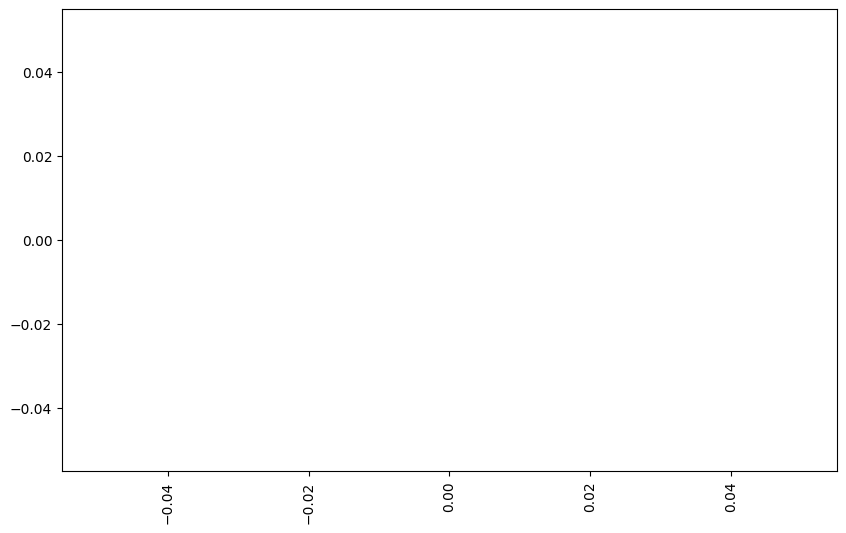

In [ ]:
import matplotlib.pyplot as plt

# Plot the number of variants per chromosome
chrom_count.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Variants per Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Variant Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import os
print(os.path.isfile('CRISPR1.Variants.vcf'))  # Check if the file exists


True


In [ ]:
import pandas as pd
import os

# Check if file exists
file_path = "CRISPR1.Variants.vcf"
if not os.path.isfile(file_path):
    print(f"File {file_path} does not exist.")
else:
    # Attempt to read the file with proper settings
    try:
        # Define columns based on VCF structure
        columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'CRISPR1.bam.sorted']

        # Read the VCF file while skipping metadata lines (lines starting with '##')
        df = pd.read_csv(file_path, delimiter='\t', comment='#', header=None, names=columns)

        # Check if the dataframe is empty
        if df.empty:
            print("The DataFrame is empty. Please check the file contents.")
        else:
            # Display the first few rows of the dataframe
            print(df.head())

            # Count variants per chromosome
            chrom_count = df['CHROM'].value_counts()
            print(chrom_count)

            # Plot the variant count per chromosome
            import matplotlib.pyplot as plt
            chrom_count.plot(kind='bar', figsize=(10, 6))
            plt.title('Number of Variants per Chromosome')
            plt.xlabel('Chromosome')
            plt.ylabel('Variant Count')
            plt.xticks(rotation=90)
            plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


The DataFrame is empty. Please check the file contents.


In [ ]:
import pandas as pd

# Example list of target genomic positions
cr_target_positions = ['36937210', '36996899', '85400441', '85776687', '85918029', '86198668', '86236802', '86658391', '87049235']

# Load your VCF data (make sure to specify your file path correctly)
# Assuming your file is named 'VCF_file.tsv' or similar
vcf_data1 = pd.read_csv("VCF_file.tsv", delimiter="\t", comment="#")

# Convert the 'POS' column to string if necessary to match the target positions
vcf_data1["POS"] = vcf_data1["POS"].astype(str)

# Check if 'POS' column is correctly loaded and matches target positions
print("First few rows of the VCF data:")
print(vcf_data1.head())

# Check the number of matches between 'POS' and the target positions
matches_count = vcf_data1["POS"].isin(cr_target_positions).sum()
print(f"Number of matches in POS column: {matches_count}")

# Filter for intended mutations
intended_mutations = vcf_data1[vcf_data1["POS"].isin(cr_target_positions)]

# Extract relevant columns (CHROM, POS, REF, ALT)
intended_mutations_df = intended_mutations[["CHROM", "POS", "REF", "ALT"]]

# Display results
print("\nIntended Mutations:")
print(intended_mutations_df)


FileNotFoundError: [Errno 2] No such file or directory: 'VCF_file.tsv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!bcftools view /content/drive/MyDrive/CRISPR1.Variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=171031299>
##contig=<ID=

In [ ]:
!bcftools view /content/drive/MyDrive/CRISPR1.Variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=171031299>
##contig=<ID=

In [ ]:
!bcftools view /content/drive/MyDrive/CRISPR1.Variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=171031299>
##contig=<ID=

In [ ]:
!bcftools mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted | bcftools call --multiallelic-caller --variants-only --ploidy 1 -mv -Oz -o CRISPR1.Variants.vcf


[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 2000


In [ ]:
!bcftools view /content/drive/MyDrive/CRISPR2.Variants.vcf


Streaming output truncated to the last 5000 lines.
chr3	84213037	.	T	A	5.75677	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=34	GT:PL	1:34,0
chr3	84213040	.	T	A	5.75677	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=34	GT:PL	1:34,0
chr3	84213043	.	T	A	5.75677	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=34	GT:PL	1:34,0
chr3	84213047	.	C	A	5.75677	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=34	GT:PL	1:34,0
chr3	84213050	.	T	A	5.75677	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=34	GT:PL	1:34,0
chr3	84357793	.	A	T	3.7766	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:31,0
chr3	84380056	.	G	C	5.75677	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:34,0
chr3	84391407	.	C	G	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:38,0
chr3	84517045	.	A	T	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:38,0
chr3	84517049	.	A	T	8.99921	.	DP

In [ ]:
import cyvcf2

# Load the VCF file
vcf = cyvcf2.VCF('/content/drive/MyDrive/CRISPR1.Variants.vcf')

# Print information about the VCF file
for record in vcf:
    print(record)


In [ ]:
import cyvcf2

# Load the VCF file
vcf = cyvcf2.VCF('/content/drive/MyDrive/CRISPR2.Variants.vcf')

# Print information about the VCF file
for record in vcf:
    print(record)


Streaming output truncated to the last 5000 lines.
chr4	31021675	.	T	A	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:38,0

chr4	31031196	.	A	T	5.75677	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:34,0

chr4	31062048	.	C	G	8.13869	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:37,0

chr4	31107776	.	T	A	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:38,0

chr4	31166775	.	T	A	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:38,0

chr4	31166776	.	T	A	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=60	GT:PL	1:38,0

chr4	31188536	.	A	T	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=49	GT:PL	1:38,0

chr4	31188537	.	A	T	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=49	GT:PL	1:38,0

chr4	31188539	.	T	G	8.99921	.	DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=1;AN=1;DP4=0,0,0,1;MQ=49	GT:PL	1:38,0

chr4	31188540	.	C	T	8.

In [ ]:
import pandas as pd

# Convert VCF to Pandas DataFrame
data = []
for record in vcf:
    data.append({
        'CHROM': record.CHROM,
        'POS': record.POS,
        'ID': record.ID,
        'REF': record.REF,
        'ALT': record.ALT
    })

# Create DataFrame
df = pd.DataFrame(data)
print(df)


Empty DataFrame
Columns: []
Index: []


In [ ]:
import cyvcf2
import pandas as pd

# Load the VCF file containing the CRISPR data
vcf_file = '/content/drive/MyDrive/CRISPR2.Variants.vcf'
vcf = cyvcf2.VCF(vcf_file)

# Target mutation positions on chromosome 2
cr_target_positions = ['36937210', '36996899', '85400441', '85776687', '85918029', '86198668', '86236802', '86658391', '87049235']

# Extract mutations corresponding to the target positions
intended_mutations = []

for record in vcf:
    if str(record.POS) in cr_target_positions:
        intended_mutations.append({
            'CHROM': record.CHROM,
            'POS': record.POS,
            'REF': record.REF,
            'ALT': record.ALT,
            'QUAL': record.QUAL,
            'FILTER': record.FILTER
        })

# Create a DataFrame of the intended mutations
intended_mutations_df = pd.DataFrame(intended_mutations)
print("Intended Mutations DataFrame:")
print(intended_mutations_df)


Intended Mutations DataFrame:
  CHROM       POS     REF        ALT        QUAL FILTER
0  chr2  36937210       C        [T]  127.195999   None
1  chr2  36996899  CTTTTT  [CTTTTTT]  120.194000   None
2  chr2  85400441       A        [G]  121.208000   None
3  chr2  85776687       T        [A]  146.416000   None
4  chr2  86198668       A        [G]  124.247002   None
5  chr2  86236802      CT      [CTT]  118.134003   None
6  chr2  86658391       C       [CG]   93.415100   None


In [ ]:
# Extract all mutations in the genome
all_mutations = []

for record in vcf:
    all_mutations.append({
        'CHROM': record.CHROM,
        'POS': record.POS,
        'REF': record.REF,
        'ALT': record.ALT,
        'QUAL': record.QUAL,
        'FILTER': record.FILTER
    })

# Create a DataFrame of all mutations
all_mutations_df = pd.DataFrame(all_mutations)

# Filter out the intended mutations (off-target mutations are not at the target positions)
off_target_mutations_df = all_mutations_df[~all_mutations_df['POS'].isin(cr_target_positions)]
print("Off-Target Mutations DataFrame:")
print(off_target_mutations_df)


KeyError: 'POS'

In [ ]:
# Target mutation positions on chromosome 2
cr_target_positions = ['36937210', '36996899', '85400441', '85776687', '85918029', '86198668', '86236802', '86658391', '87049235']

# Example VCF record (simulating a mutation record)
vcf_record = {'CHROM': '2', 'POS': '36937210', 'REF': 'A', 'ALT': 'T', 'QUAL': '99.0', 'FILTER': 'PASS'}

# Check if POS is in the target positions list
if str(vcf_record['POS']) in cr_target_positions:
    print("Intended Mutation Found:", vcf_record)
else:
    print("No match")


Intended Mutation Found: {'CHROM': '2', 'POS': '36937210', 'REF': 'A', 'ALT': 'T', 'QUAL': '99.0', 'FILTER': 'PASS'}


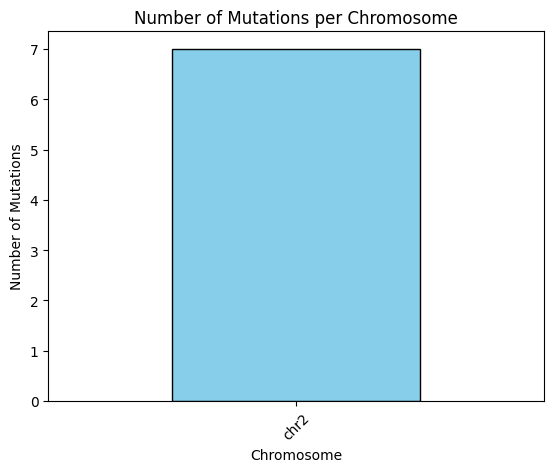

In [ ]:
import matplotlib.pyplot as plt

# Group by 'CHROM' and count mutations per chromosome
mutation_count_per_chrom = intended_mutations_df.groupby('CHROM').size()

# Plot a bar chart
mutation_count_per_chrom.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Mutations per Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Number of Mutations')
plt.xticks(rotation=45)
plt.show()


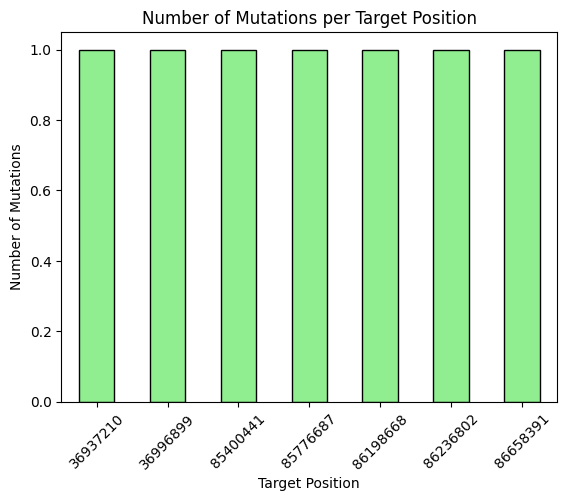

In [ ]:
# Group by 'POS' (target positions) and count mutations at each position
mutation_count_per_pos = intended_mutations_df.groupby('POS').size()

# Plot a bar chart
mutation_count_per_pos.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Mutations per Target Position')
plt.xlabel('Target Position')
plt.ylabel('Number of Mutations')
plt.xticks(rotation=45)
plt.show()


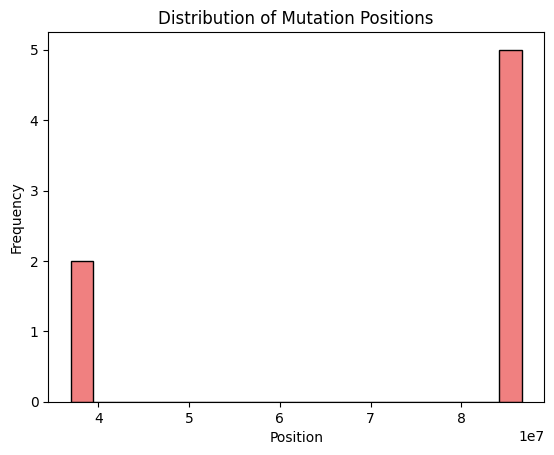

In [ ]:
# Plot a histogram of the mutation positions (POS)
plt.hist(intended_mutations_df['POS'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Mutation Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
from cyvcf2 import VCF

# Specify the new VCF file path
vcf_file = '/content/drive/MyDrive/CRISPR1.Variants.vcf'

# Load the VCF data using cyvcf2
vcf_data = VCF(vcf_file)

# Initialize a list to hold the mutations
mutations = []

# Iterate through the VCF records and store relevant mutation data
for record in vcf_data:
    mutation = {
        'CHROM': record.CHROM,
        'POS': record.POS,
        'REF': record.REF,
        'ALT': record.ALT[0],  # Assuming the first alternative allele
    }
    mutations.append(mutation)

# Convert the list of mutations to a pandas DataFrame
vcf_data_df = pd.DataFrame(mutations)

# Define the target positions (same as before)
cr_target_positions = [
    '36937210', '36996899', '85400441', '85776687', '85918029',
    '86198668', '86236802', '86658391', '87049235'
]

# Filter for mutations at the target positions
intended_mutations = vcf_data_df[vcf_data_df["POS"].isin(cr_target_positions)]

# Save to a DataFrame containing only the relevant columns
intended_mutations_df = intended_mutations[["CHROM", "POS", "REF", "ALT"]]

# Display the filtered DataFrame
print("Intended Mutations:")
print(intended_mutations_df)


KeyError: 'POS'

In [ ]:
import matplotlib.pyplot as plt

# Group by 'CHROM' and count mutations per chromosome
mutation_count_per_chrom = intended_mutations_df.groupby('CHROM').size()

# Plot a bar chart
mutation_count_per_chrom.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Mutations per Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Number of Mutations')
plt.xticks(rotation=45)
plt.show()


RangeIndex(start=0, stop=0, step=1)


In [ ]:
!samtools view  /content/drive/MyDrive/CRISPR1.bam.sorted

Streaming output truncated to the last 5000 lines.
SRRCrispr.11151159	0	chr1	75552659	60	100M	*	0	0	TTGTGCGGCTCAGCGAGGCTGTTCTCTTGGAGTCTGTGCTGGAGGTCCCCGTGCCTGTTCGCTTCCTCTTTGTGATGCTGGGGCCCAGCCATACCAGCAC	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRRCrispr.11151074	0	chr1	75552661	60	100M	*	0	0	GTGCGGCTCAGCGAGGCTGTTCTCTTGGAGTCTGTGCTGGAGGTCCCCGTGCCTGTTCGCTTCCTCTTTGTGATGCTGGGGCCCAGCCATACCAGCACTG	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRRCrispr.283704	0	chr1	75552729	60	100M	*	0	0	TGTGATGCTGGGGCCCAGCCATACCAGCACTGACTATCACGAATTAGGGCGCTCCATTGCCACACTCATGTCTGACAAGGTTGGTTCTGTAACCTGGGAT	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:20
SRRCrispr.11151108	0	chr1	75552745	60	63M37S	*	0	0	AGCCATACCAGCACTGACTATCACGAATTAGGGCGCTCCATTGCCACACT

In [ ]:
!samtools view CRISPR1.bam.sorted | head


SRRCrispr.1	0	chr1	3006751	60	100M	*	0	0	CCAAAATAGAAAAAAAAAAAAAAAAGAGTAACGGAATGGGAAAAAAAAAGAAAGAAAAAAGAAAAAGAAAAGAAAAAGAAAAAGAAAAAAAGCCCCCTTT	CCCCCGGDFFFFGGGGGGC+CFCFGGGCFCFFGGGGFAFC@CCEGGGFCE74>B?FFFGFG7FCBEGFGGGGG@F7FC<9FFF@<:DF>FFEEFC>FFGG	NM:i:0	MD:Z:100	AS:i:100	XS:i:39
SRRCrispr.2	0	chr1	3007201	60	100M	*	0	0	CATTCTTCTCAGTTTATTCATACATGTTTTAATTTCCATAGTTTTATTATGTTCCTTTGGGCTTTTTTTCTGCCCCCCCCCCTTTTTGTGCCTTGTGATT	CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGGEG@GGCFGGGGABGGGGGGGGGGGGGGGGGFGGAGGDGGGE:C:CGE:EE?,AGC<	NM:i:0	MD:Z:100	AS:i:100	XS:i:19
SRRCrispr.3	0	chr1	3007351	60	100M	*	0	0	GCAAAGGCTTTCCCAAGTCAAGCCTACTGGAGGTTCTAGGATCCATCACTCTAGCCTTTCCTGAGGATTAGGCTTTTCCCGGAGTTGAGTGTAACTTTTT	CCCCCGGGGGGGGCFGGDFGGGFGFGGGGGGGGGGGGFGGGGGGEGGGGGDGGGGGGGGFGGGGGGGGGGGGGGGEFGGGGEGGGEGGGGGDGEGGGGGA	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRRCrispr.4	0	chr1	3007421	60	100M	*	0	0	GGCTTTTCCCGGAGTTGAGTGTAACTTTTTCCATCAGTTTTAATACATTAAGCAGCTTATCTCTGCTTCATTTTAGAAACCTGTAATCTGTTGCTTTGCC	CCCCCGDFGFFGGGGGEGGGGAGGCEGGGFF

In [ ]:

import pysam

# Open the BAM file
BamSortedFile2 = pysam.AlignmentFile('CRISPR1.bam.sorted', 'rb')

# Fetch the first read and print it
for read in BamSortedFile2.fetch(until_eof=True):
    print(read)
    break  # Print only the first read for brevity


SRRCrispr.1	0	#0	3006751	60	100M	*	0	0	CCAAAATAGAAAAAAAAAAAAAAAAGAGTAACGGAATGGGAAAAAAAAAGAAAGAAAAAAGAAAAAGAAAAGAAAAAGAAAAAGAAAAAAAGCCCCCTTT	array('B', [34, 34, 34, 34, 34, 38, 38, 35, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 34, 10, 34, 37, 34, 37, 38, 38, 38, 34, 37, 34, 37, 37, 38, 38, 38, 38, 37, 32, 37, 34, 31, 34, 34, 36, 38, 38, 38, 37, 34, 36, 22, 19, 29, 33, 30, 37, 37, 37, 38, 37, 38, 22, 37, 34, 33, 36, 38, 37, 38, 38, 38, 38, 38, 31, 37, 22, 37, 34, 27, 24, 37, 37, 37, 31, 27, 25, 35, 37, 29, 37, 37, 36, 36, 37, 34, 29, 37, 37, 38, 38])	[('NM', 0), ('MD', '100'), ('AS', 100), ('XS', 39)]


In [ ]:
CRISPR1.bam.sorted

In [ ]:
MM10/Mouse.fasta

In [ ]:
# bcftools will variant call to turn our bam file into a vcf file
!bcftools mpileup -f MM10/Mouse.fasta --max-depth  2000 'CRISPR1.bam.sorted' | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o CRISPR1.Variants.vcf.gz
#Creates CRISPR1.Variants.vcf.gz or VCF ZIP FILE

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 2000


In [ ]:
from re import M
!bcftools view MM10/Mouse.fasta


Failed to read from MM10/Mouse.fasta: unknown file type


In [ ]:
!bcftools view CRISPR1.Variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=171031299>
##contig=<ID=

In [ ]:
!bcftools view CRISPR1.Variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=171031299>
##contig=<ID=

In [ ]:
!cat MM10/Mouse.fasta


Streaming output truncated to the last 5000 lines.
AGAGACTGATAGTTTTTCTGAAGGTAGTTTTTTCTAATTACAATTCTGTA
GTGGTGAGATAGTATATATTAGAGGAAGGATGGAACTAGAAGGGTATTTA
CATAACATCACTCTAACAATAGCTTACAAGTATAGTTACAGAGCTTTATA
AATGAATTAATTCATATATTCTGGAAACAAAATTATGAGGATGTAAATAT
TTCCATTCAAAATAGGATCCTCAGACCAGTAAGCACATATCTATGTAAAT
CAGAGCAAAAAAAAAGCTACTTCTCTGTATAGTGCAGAGTAAGCTTAACT
TATAGTCCAAGTTCAGTATCACTTTAGCACTCATATCTGATGCCCACAAA
TGCCCTTCAgtacagctcagctccagagatgatgcctcattgtctcattg
attctctctccttctcctcttcctctgctctcttttttcttctcactttc
ttctctctctattgttctctctctctctctctttctttctctcttgtgct
ctctgttttggtttctcACtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgt
gtgtgtgtgtgtgtgtgACagagagagagagagagagagagagagagaga
gagagagagagagagagagaagagagagagagGTGTGAAACAGAGTGCTT
GAGAGAGAGAGAGTGATTGAGAGAAAAAAAAGAAGCCACCAGTATTTACT
TAGTGAAAATTTAGTTCATTAATTGGCAAAAGagttcagttggtaatata
tttgcctagattgcaagacatgttttattagatatctagcatttctgaaa
cttggtgtgttcctatatttacagcaaacaataggtgatgttaggtggat
cagtgattgaatgtcatctttaactagaacaataaaatcaaggtcaatat
agggacaagagtctttgtctcaaaaaCCTGC

KeyboardInterrupt: 

In [ ]:
!bwa mem mouseref CRISPR.R1.fastq > CRISPR1.sam
#Convert SAM to BAM
!samtools view -bS CRISPR1.sam > CRISPR1.bam
# samtools will sort our bam file however samtools view -bS -q 12 filters the input BAM file
!samtools view -bS -q 12 CRISPR1.bam | samtools sort -o CRISPR1.bam.sorted

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[fread] Unexpected end of file
[main_samview] fail to read the header from "CRISPR1.sam".
[main_samview] fail to read the header from "CRISPR1.bam".
samtools sort: failed to read header from "-"


In [ ]:
!bcftools view CRISPR1.Variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f MM10/Mouse.fasta --max-depth 2000 CRISPR1.bam.sorted
##reference=file://MM10/Mouse.fasta
##contig=<ID=chr1,length=195471971>
##contig=<ID=chr2,length=182113224>
##contig=<ID=chr3,length=160039680>
##contig=<ID=chr4,length=156508116>
##contig=<ID=chr5,length=151834684>
##contig=<ID=chr6,length=149736546>
##contig=<ID=chr7,length=145441459>
##contig=<ID=chr8,length=129401213>
##contig=<ID=chr9,length=124595110>
##contig=<ID=chr10,length=130694993>
##contig=<ID=chr11,length=122082543>
##contig=<ID=chr12,length=120129022>
##contig=<ID=chr13,length=120421639>
##contig=<ID=chr14,length=124902244>
##contig=<ID=chr15,length=104043685>
##contig=<ID=chr16,length=98207768>
##contig=<ID=chr17,length=94987271>
##contig=<ID=chr18,length=90702639>
##contig=<ID=chr19,length=61431566>
##contig=<ID=chrM,length=16299>
##contig=<ID=chrX,length=171031299>
##contig=<ID=

In [ ]:
# unzip the vcf file
!gzip -df CRISPR1.Variants.vcf

gzip: CRISPR1.Variants.vcf: unknown suffix -- ignored


In [ ]:
# unzip the vcf file
!gzip -d CRISPR2.Variants.vcf.gz


gzip: CRISPR2.Variants.vcf.gz: unexpected end of file


In [ ]:
import cyvcf2

# Load the VCF file
vcf = cyvcf2.VCF('CRISPR1.Variants.vcf')

# Print information about the VCF file
for record in vcf:
    print(record)

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x600 with 0 Axes>

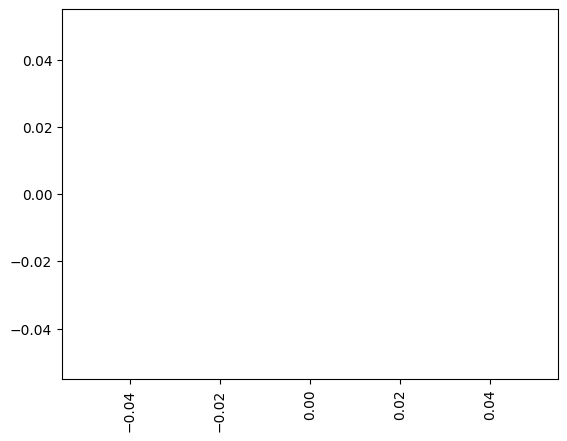

In [ ]:
import pandas as pd
import cyvcf2
import matplotlib.pyplot as plt

# Define the intended target sites (positions on chromosome 2)
target_sites = [
    36937210, 36996899, 85400441, 85776687, 85918029,
    86198668, 86236802, 86658391, 87049235
]

# Load the VCF file using cyvcf2
vcf = cyvcf2.VCF('CRISPR1.Variants.vcf')

# Prepare to collect mutation data
intended_mutations = []
off_target_mutations = []

# Loop through each variant in the VCF file
for record in vcf:
    # Extract data for each variant
    chrom = record.CHROM
    pos = record.POS
    ref = record.REF
    alt = record.ALT
    genotype = record.gt_types[0]  # Assuming we're working with one sample (adjust as needed)

    # Check if the mutation is at an intended target site
    if chrom == '2' and pos in target_sites:
        intended_mutations.append([chrom, pos, ref, alt, genotype])
    elif chrom != '2':
        off_target_mutations.append([chrom, pos, ref, alt, genotype])

# Convert the lists to DataFrames
df_intended = pd.DataFrame(intended_mutations, columns=['CHROM', 'POS', 'REF', 'ALT', 'GENOTYPE'])
df_off_target = pd.DataFrame(off_target_mutations, columns=['CHROM', 'POS', 'REF', 'ALT', 'GENOTYPE'])

# Summary DataFrame for off-target mutations per chromosome
summary = df_off_target.groupby('CHROM').size().reset_index(name='MUTATIONS')

# Plotting the number of mutations per chromosome
plt.figure(figsize=(10, 6))
summary.plot(kind='bar', x='CHROM', y='MUTATIONS', legend=False)
plt.title('Off-Target Mutations per Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Number of Mutations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Output DataFrames for review
print("Intended Mutations DataFrame:")
print(df_intended)
print("\nOff-Target Mutations DataFrame:")
print(df_off_target)
print("\nSummary DataFrame (Off-Target Mutations):")
print(summary)
